In [8]:
from functools import partial
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from PIL import Image

In [53]:
coo.data, coo.col, coo.row, coo.getcol(0), coo.has_canonical_format, coo.shape, coo.nnz

(array([2, 4, 9]),
 array([1, 4, 2], dtype=int32),
 array([1, 3, 0], dtype=int32),
 <5x1 sparse matrix of type '<class 'numpy.int64'>'
 	with 0 stored elements in Compressed Sparse Row format>,
 False,
 (5, 5),
 3)

In [54]:
def array_plot(arr, size, xoff=0, yoff=0, alpha=1, color=None, text=True, **kwargs):    
    # get coordinates
    ys, xs = np.indices(arr.shape)
    idxs = [tuple(idx) for idx in np.column_stack([ys.ravel(), xs.ravel()])]
    xs = xoff + xs
    ys = yoff + ys
    xys = np.column_stack([xs.ravel(), ys.ravel()])
  
    lw = 3 * size / 10
    
    filldata = []
    for xy, idx in zip(xys, idxs):
        if not arr[idx]:
#             rect = plt.Rectangle(xy - 0.5, 1, 1, color=color, **kwargs)
            border = plt.Rectangle(xy - 0.5, 1, 1, linewidth=lw, facecolor='none', linestyle='--', edgecolor='k', alpha=alpha, **kwargs)
            plt.gca().add_patch(border)
        else:
            filldata.append(xy)
    
    for xy in filldata:
        rect = plt.Rectangle(xy - 0.5, 1, 1, color=color, **kwargs)
        plt.gca().add_patch(rect)
        border = plt.Rectangle(xy - 0.5, 1, 1, linewidth=lw, facecolor='none', edgecolor='k', alpha=alpha, **kwargs)
        plt.gca().add_patch(border)
    
    # display array values
    if text:
        for (x, y), val in zip(xys, arr.ravel()):
            s = str(val)
            x = x - 0.1 * len(s) - 0.01
            y = y + 0.15
            plt.text(x, y, s=s, fontsize=size * 1.5, fontweight=100, alpha=alpha)

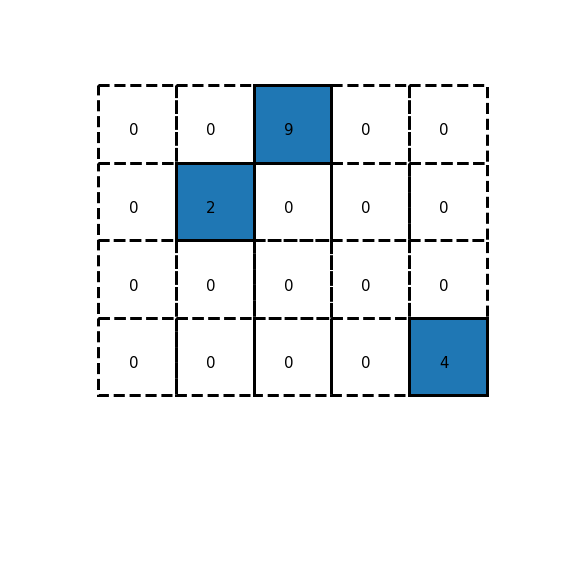

In [50]:
darkcolor = 'deepskyblue'
lightcolor = 'lightskyblue'

figsize = 10
max_width = 5
max_height = 5

plt.figure(figsize=(figsize, figsize))
arr_plt = partial(array_plot, size=figsize, xoff=1, yoff=1)

canvas = np.zeros((max_height + 2, max_width + 2))
plt.imshow(canvas, alpha=0, aspect='equal')
plt.axis('off')
# plt.text(12, 6.7, '© Matt Eding')

arr_plt(arr)

In [124]:
row = [1, 3, 0]
col = [1, 4, 2]
data = [2, 4, 9]
coo = sparse.coo_matrix((data, (row, col)), shape=(6, 5))
arr = coo.toarray()

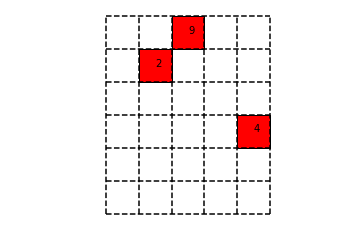

In [128]:
color = 'red'

w, h = coo.shape
for i in range(w + 1):
    plt.plot([0, h], [i, i], color='black', linestyle='--')
    
for j in range(h + 1):
    plt.plot([j, j], [0, w], color='black', linestyle='--')

for x, y, val in zip(coo.col, coo.row, coo.data):
    xy = (x, w - y - 1)
    rect = plt.Rectangle(xy, 1, 1, color=color)
    plt.gca().add_patch(rect)
    border = plt.Rectangle(xy, 1, 1, facecolor='none', edgecolor='k')
    plt.gca().add_patch(border)
    
    x, y = xy
    s = str(val)
    x = x + 0.5 * len(s)
    y = y + 0.5
    plt.text(x, y, s=s, fontweight=100)

# plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.axis('off');
# plt.tight_layout()

In [126]:
coo.toarray()

array([[0, 0, 9, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])